### Data Cleaning and Processing

We will first load a  csv file using pandas.After that we will proceed to data cleaning/prepartion and few functions that are frequently used in Data Processing.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
print(np.__version__)
print(pd.__version__)
# Author @ Ramendra Kumar

1.19.1
1.1.1


In [3]:
pd.set_option("display.max_rows", 10)  # This is the setting so that pandas shows only 10 rows in result.

#####  EXPLANATION OF DATA
* Below is the snippet of the data set showing only a few rows.
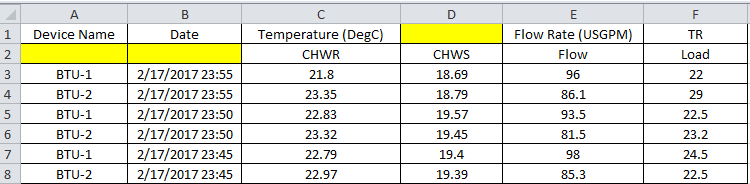
* This is data of a cooling system used in a Data Centre.' BTU-1' and 'BTU-2' (in 'Device Name' column) are two devices that are taking chilled water return temperature(CHWR), chilled water supply temperature(CHWS)( both in 'Temperature (DegC)and in a blank ' column), the Flow rate of water(in 'Flow Rate (USGPM)' column) and cooling carried out in Tons of refrigeration(in 'TR' columns) at an interval of 5 minutes on a particular day ( in 'Date' column). Data is being recorded for 24 hours every day and this is just a data of one day. We are going to use it to understand Data cleaning and processing through it. This is data from my Research on Data Center at IITD. 
* I have deliberately colored blank cells. While we import this file using pd.read_csv (as below), the first row automatically is taken as a column header, and any blank cell in the first row will appear as the default column name -'Unnamed:' followed by default column integer index( in this case 3, see below). Similarly, any blank cell on any row after that will be automatically filled with 'NaN'(see below).

### 1. Loading Data and getting information about the data

In [3]:
data=pd.read_csv('BTU.csv') # Data loading.
data.head()
# Path should be given if file is in another directory like : pd.read_csv(r'C:\Users\hP\Desktop\Python_Starter\BTU.csv')

,Device Name,Date,Temperature (DegC),Unnamed: 3,Flow Rate (USGPM),TR
0,NaN,NaN,CHWR,CHWS,Flow,Load
1,BTU-1,2/17/2017 23:55,21.8,18.69,96,22
2,BTU-2,2/17/2017 23:55,23.35,18.79,86.1,29
3,BTU-1,2/17/2017 23:50,22.83,19.57,93.5,22.5
4,BTU-2,2/17/2017 23:50,23.32,19.45,81.5,23.2


In [4]:
data.tail()

,Device Name,Date,Temperature (DegC),Unnamed: 3,Flow Rate (USGPM),TR
570,BTU-2,2/17/2017 0:10,22.64,18.75,94.9,27.2
571,BTU-1,2/17/2017 0:05,22.1,18.79,112.4,27.4
572,BTU-2,2/17/2017 0:05,22.62,18.79,95.7,27
573,BTU-1,2/17/2017 0:00,21.97,18.79,111.2,26
574,BTU-2,2/17/2017 0:00,22.7,18.73,94.9,27.8


###### .head() and .tail() gives only first and last 5 rows entries value,for viewing.

In [5]:
data.info()
# Using this, we can get number rows ,number of columns with its name, number of non null entries in each column 
# and their data types.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 575 entries, 0 to 574
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Device Name         574 non-null    object
 1   Date                574 non-null    object
 2   Temperature (DegC)  575 non-null    object
 3   Unnamed: 3          573 non-null    object
 4   Flow Rate (USGPM)   575 non-null    object
 5   TR                  574 non-null    object
dtypes: object(6)
memory usage: 27.1+ KB


* Result shows that all the columns values are stored as 'object'  data types.
* Here object data type means--> data are stored as 'string'.
* In some cases, in any column, each cell may contain list,dictionary or any other python data structure.In such cases also the column data type will be 'object'.

In [6]:
data.dtypes # This gives only the data types of each columns. 

Device Name           object
Date                  object
Temperature (DegC)    object
Unnamed: 3            object
Flow Rate (USGPM)     object
TR                    object
dtype: object

### 2. Renaming the column Name

In [7]:
data.rename({'Temperature (DegC)':'CHWR','Unnamed: 3':'CHWS','Flow Rate (USGPM)':'Flow','TR':'Load'},
            axis='columns',inplace=True)
# can use in any number of columns
# Inside '.rename' pass the dictionary,where previous column name is given as 'key' and new column name is given as 'value'.Simpe!!!
data.head()

,Device Name,Date,CHWR,CHWS,Flow,Load
0,NaN,NaN,CHWR,CHWS,Flow,Load
1,BTU-1,2/17/2017 23:55,21.8,18.69,96,22
2,BTU-2,2/17/2017 23:55,23.35,18.79,86.1,29
3,BTU-1,2/17/2017 23:50,22.83,19.57,93.5,22.5
4,BTU-2,2/17/2017 23:50,23.32,19.45,81.5,23.2


### 3.  Dropping the  first row

In [8]:
data.drop(0,axis=0,inplace=True)
# If you want to delete multiple rows pass list of rows to be deleted.
# If you want to delete columns  pass colum name (or list of columns for multiple) and use axis=1
# Note: You have to pass Index or column labels, Default integer based index will not work here.
# Note: In case of rows index, integer based default index and label may be same.
data.head()

,Device Name,Date,CHWR,CHWS,Flow,Load
1,BTU-1,2/17/2017 23:55,21.8,18.69,96,22
2,BTU-2,2/17/2017 23:55,23.35,18.79,86.1,29
3,BTU-1,2/17/2017 23:50,22.83,19.57,93.5,22.5
4,BTU-2,2/17/2017 23:50,23.32,19.45,81.5,23.2
5,BTU-1,2/17/2017 23:45,22.79,19.4,98,24.5


* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html

### 4.Checking for nulll entries

In [9]:
data.isnull()
# Actually, this is comparison statement.
# This function compares each cell of each column with NaN.
# If any cell contain NaN, then it returns True otherwise False.See the result.


,Device Name,Date,CHWR,CHWS,Flow,Load
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,False,False
...,...,...,...,...,...,...
570,False,False,False,False,False,False
571,False,False,False,False,False,False
572,False,False,False,False,False,False
573,False,False,False,False,False,False


In [10]:
data.isnull().sum() # Here axis=0 by default
# Equivalent integer value of 'False' is 0 and equivalent integer of 'True' is 1.
# This is the summation of each cell of all column.
# All 'True' will be added as 1 and indirectly we are counting number of NaN entries in all columns.
# See the result, there are only two NaN in 'CHWS' column and only  one 'NaN' in Load column.

Device Name    0
Date           0
CHWR           0
CHWS           2
Flow           0
Load           1
dtype: int64

In [11]:
data.notnull().sum() # Opposite of .isnull()

Device Name    574
Date           574
CHWR           574
CHWS           572
Flow           574
Load           573
dtype: int64

### 5.Checking Non-Numerical Entries (which can not be conveted into numeric type)
* Having Non-Numerical entries (which can not be conveted into numeric type) in Columns except of 'Device Name' and 'Date' are not valid and we have to remove them or replace them with logical values.
* Fisrt we have to find non-numerical entries in each column. 
* We are going to make our own function for that.

In [12]:
def NonNumEntry(df,col_s,col_e):  ## df> dataframe to be passed, col_s>starting column ; col_e> ending column
    D={}
    n=len(df)
    for i in range(col_s,col_e+1):
        lis=[]
        for j in range(n):
            try:
                if type(float(df.iloc[j,i]))==float:
                    pass 
            except:
                v=df.iloc[j,i]
                if v not in lis:
                    lis.append(v)
        D[i]=lis
    return D

In [13]:
NonNumEntry(data,2,5)

{2: ['--'], 3: ['hjkhk', '--'], 4: ['&', '##', '--'], 5: ['--']}

* In above result keys of the dictionary are column index and values are the list showing unique entris in each column which cannot be converted into numeric data type. 

##### We can see all the entries of different columns where non-numeric entries are there, as given below:

In [14]:
data[data['CHWR']=='--'] #Checking in the 'CHWR' column for '--'( in second columns)
# OR :> 
#data[data.iloc[:,2]=='--']

,Device Name,Date,CHWR,CHWS,Flow,Load
120,BTU-1,2/17/2017 18:55,--,--,--,--
121,BTU-2,2/17/2017 18:55,--,--,--,--
157,BTU-1,2/17/2017 17:20,--,--,--,--
158,BTU-2,2/17/2017 17:20,--,--,--,--
183,BTU-1,2/17/2017 16:15,--,--,--,--
184,BTU-2,2/17/2017 16:15,--,--,--,--
197,BTU-1,2/17/2017 15:40,--,--,--,--
198,BTU-2,2/17/2017 15:40,--,--,--,--


In [15]:
#data[data['CHWS']=='hjkhk'] #Checking in the 'CHWs' column for 'hjkhk'
# OR :> 
data[data.iloc[:,3]=='hjkhk']

,Device Name,Date,CHWR,CHWS,Flow,Load
19,BTU-1,2/17/2017 23:10,22.81,hjkhk,95.5,28.3


##### * In if statement inside try you can use flowing two function as well. Try yourself!!

In [16]:
isinstance(7.89, (int, float))  ## Bonus check it 

True

In [17]:
np.isreal('Ram')  ## Bonus check it 

False

### 6. Replacing all non numeric value (which can not be converted into Numeric ) with np.nan and displaying all row having NaN.
* I am going to illustrate this by  two method (with their differences) for that I am copying the 'data' and making two dataframe named 'df1' and 'df2', so that original data remain intact.
* First Method is .replace()
* Second Method is .to_numeric()

##### 6.1 Using .replace()

In [18]:
df1=data.copy()

###### From operation number 5, we know all the entries which can not be converted into numeric. Now we are going to replace all those entries with NaN.
###### NaN is treated as float and we have available methods  in numpy and pandas to handle it. Thus it is standard practice to replace all entries which are not convertible into numeric with NaN.  

In [19]:
df1.replace(['--','hjkhk','&','##'],np.nan,inplace=True) # all Non Numeric entry are replaced by np.nan 

In [20]:
df1.isnull().sum()

Device Name     0
Date            0
CHWR            8
CHWS           11
Flow           10
Load            9
dtype: int64

In [21]:
df1.dtypes

Device Name    object
Date           object
CHWR           object
CHWS           object
Flow           object
Load           object
dtype: object

* Now we can see all the entries having NaN values

In [22]:
df1[df1.CHWR.isnull()|df1.CHWS.isnull()|df1.Flow.isnull()|df1.Load.isnull()]

,Device Name,Date,CHWR,CHWS,Flow,Load
10,BTU-2,2/17/2017 23:35,23.43,NaN,115.7,40.4
19,BTU-1,2/17/2017 23:10,22.81,NaN,95.5,28.3
26,BTU-2,2/17/2017 22:55,23.11,19.07,NaN,25.2
32,BTU-2,2/17/2017 22:40,23.02,20.24,NaN,17.6
40,BTU-2,2/17/2017 22:20,23.11,NaN,83.1,19.7
...,...,...,...,...,...,...
158,BTU-2,2/17/2017 17:20,NaN,NaN,NaN,NaN
183,BTU-1,2/17/2017 16:15,NaN,NaN,NaN,NaN
184,BTU-2,2/17/2017 16:15,NaN,NaN,NaN,NaN
197,BTU-1,2/17/2017 15:40,NaN,NaN,NaN,NaN


In [23]:
##Examine the subset of a data set
#df.iloc[:,2].isnull().sum() 
df1.CHWR.isnull().sum()
#df['CHWR'].isnull().sum()

8

#### Explanation:
###### In above operations non numerical entries (that can't be converted to numeric) which we have passed in 'replace' function are replced with NaN value.But data type of each column remained as it was before.
###### Notice that, even numerical entries in columns from 2nd to last, are stored as string thus the data type is showing as object.
###### No mathematical or statistical operation can be done on string data type. So we have to convert data type into numeric of each column which should be in numeric.

In [24]:
#df1.iloc[:,2].mean()# error, as all the data are string types and Mathematical opertaion is not valid for str.
# We have to convert the colums to numeric type( from third to last column)

##### 6.1.1 type casting
* 'Device Name' and 'Date' columns are stored as string data type, which is fine but remaining columns( from 2nd to 5th) should be in numeric data type only.Converting data type using .astype() method.

In [25]:
for i in range(2,6):
    df1.iloc[:,i]= df1.iloc[:,i].astype(float)  ##  all columns value converted to float

In [26]:
# Now checking the data type of each columns
df1.dtypes

Device Name     object
Date            object
CHWR           float64
CHWS           float64
Flow           float64
Load           float64
dtype: object

In [27]:
## Now Mathematical operation is valid.
df1.iloc[:,2].mean()# By default it has an argument skipna=True, thus it calculate mean of all entries by excluding NaN entries
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html

22.34886925795051

###### 6.2 Using .to_numeric()

In [28]:
df2=data.copy()

In [29]:
for i in range(2,6):
    df2.iloc[:,i]=pd.to_numeric(df2.iloc[:,i],errors='coerce')
df2.isnull().sum()
    

Device Name     0
Date            0
CHWR            8
CHWS           11
Flow           10
Load            9
dtype: int64

In [30]:
df2.dtypes

Device Name     object
Date            object
CHWR           float64
CHWS           float64
Flow           float64
Load           float64
dtype: object

##### This is entirely different operation. 'pd.to_nemeric()' function tries to convert all the entries of any column to numeric if possible and put NaN for those entries which can not be conveted into numeric.
##### Thus we can see that that type of columns from 2nd to last has been converted to float.
##### Note: for applying this, we don't have to check for those entries that are not convetible into numeric as before.
##### This operation may be more convenient in some situations and saves from many steps that we followed in 6.1. and 6.1.1.

In [31]:
df2.iloc[:,2].mean()

22.34886925795051

In [32]:
df2.describe()# Takes only numerical columns
# Descriptive statistics include those that summarize the central tendency, dispersion 
# and shape of a dataset’s distribution, excluding NaN values.
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html

,CHWR,CHWS,Flow,Load
count,566.000000,563.000000,564.000000,565.000000
mean,22.348869,18.931616,101.867376,25.323540
std,0.648024,0.493507,12.414120,3.157243
min,21.000000,17.270000,81.500000,8.100000
25%,21.810000,18.490000,94.300000,24.000000
50%,22.310000,18.910000,99.300000,25.500000
75%,22.817500,19.240000,111.725000,27.000000
max,23.940000,21.010000,136.000000,40.400000


In [33]:
df2.describe(include='all')

,Device Name,Date,CHWR,CHWS,Flow,Load
count,574,574,566.000000,563.000000,564.000000,565.00000
unique,2,288,NaN,NaN,NaN,NaN
top,BTU-1,2/17/2017 5:35,NaN,NaN,NaN,NaN
freq,288,2,NaN,NaN,NaN,NaN
mean,NaN,NaN,22.348869,18.931616,101.867376,25.32354
...,...,...,...,...,...,...
min,NaN,NaN,21.000000,17.270000,81.500000,8.10000
25%,NaN,NaN,21.810000,18.490000,94.300000,24.00000
50%,NaN,NaN,22.310000,18.910000,99.300000,25.50000
75%,NaN,NaN,22.817500,19.240000,111.725000,27.00000


### 7. Some frequently used functions
* For these operation we can now use any DataFrame df1 or df2 that we  made earlier.


In [34]:
# As before we can get all the rows which contain at least a NaN in any one columns
df1[df1.CHWR.isnull()|df1.CHWS.isnull()|df1.Flow.isnull()|df1.Load.isnull()]

,Device Name,Date,CHWR,CHWS,Flow,Load
10,BTU-2,2/17/2017 23:35,23.43,NaN,115.7,40.4
19,BTU-1,2/17/2017 23:10,22.81,NaN,95.5,28.3
26,BTU-2,2/17/2017 22:55,23.11,19.07,NaN,25.2
32,BTU-2,2/17/2017 22:40,23.02,20.24,NaN,17.6
40,BTU-2,2/17/2017 22:20,23.11,NaN,83.1,19.7
...,...,...,...,...,...,...
158,BTU-2,2/17/2017 17:20,NaN,NaN,NaN,NaN
183,BTU-1,2/17/2017 16:15,NaN,NaN,NaN,NaN
184,BTU-2,2/17/2017 16:15,NaN,NaN,NaN,NaN
197,BTU-1,2/17/2017 15:40,NaN,NaN,NaN,NaN


In [35]:
# Applying '.index' we can store those index in any variable  
a=df1[df1.CHWR.isnull()|df1.CHWS.isnull()|df1.Flow.isnull()|df1.Load.isnull()].index
print(a)
len(a)

Int64Index([10, 19, 26, 32, 40, 73, 120, 121, 157, 158, 183, 184, 197, 198], dtype='int64')


14

This gives the index of all the rows which contains at least a NaN value in any column as selectd above

In [36]:
df1.loc[a,:] ## Slicing operation, here .iloc will give erroneous result. 
# For .iloc , the first row is taken as 0th row.
# We had deleted the 0th row.After that Data row index starts from 1.
# Available row index is now label based index and we have to use .loc

,Device Name,Date,CHWR,CHWS,Flow,Load
10,BTU-2,2/17/2017 23:35,23.43,NaN,115.7,40.4
19,BTU-1,2/17/2017 23:10,22.81,NaN,95.5,28.3
26,BTU-2,2/17/2017 22:55,23.11,19.07,NaN,25.2
32,BTU-2,2/17/2017 22:40,23.02,20.24,NaN,17.6
40,BTU-2,2/17/2017 22:20,23.11,NaN,83.1,19.7
...,...,...,...,...,...,...
158,BTU-2,2/17/2017 17:20,NaN,NaN,NaN,NaN
183,BTU-1,2/17/2017 16:15,NaN,NaN,NaN,NaN
184,BTU-2,2/17/2017 16:15,NaN,NaN,NaN,NaN
197,BTU-1,2/17/2017 15:40,NaN,NaN,NaN,NaN


In [37]:
# Chekcing using .iloc. Now compare with above result.Think again and read the explanation above.
df1.iloc[a,:]

,Device Name,Date,CHWR,CHWS,Flow,Load
11,BTU-1,2/17/2017 23:30,22.74,19.45,94.3,22.9
20,BTU-2,2/17/2017 23:10,23.51,18.79,82.0,28.5
27,BTU-1,2/17/2017 22:50,22.43,18.86,95.4,25.1
33,BTU-1,2/17/2017 22:35,22.44,19.50,96.3,20.8
41,BTU-1,2/17/2017 22:15,22.28,18.91,96.1,23.9
...,...,...,...,...,...,...
159,BTU-1,2/17/2017 17:15,22.52,19.04,95.7,24.5
184,BTU-2,2/17/2017 16:15,NaN,NaN,NaN,NaN
185,BTU-1,2/17/2017 16:10,22.65,19.58,95.0,21.5
198,BTU-2,2/17/2017 15:40,NaN,NaN,NaN,NaN


In [38]:
df1['CHWR'].value_counts(dropna=False)
# This gives all the unique entries in 'CHWR' column and their repetitions.It also counts NaN.

22.64    12
22.16     9
22.21     9
NaN       8
22.15     8
         ..
22.87     1
22.05     1
22.09     1
21.67     1
21.71     1
Name: CHWR, Length: 212, dtype: int64

In [39]:
df1['CHWR'].value_counts()# By default --> dropna=False. Now It doesn't include NaN.

22.64    12
22.21     9
22.16     9
22.15     8
22.13     7
         ..
23.36     1
22.70     1
21.90     1
21.49     1
21.71     1
Name: CHWR, Length: 211, dtype: int64

In [40]:
df1.CHWR.isnull().value_counts()# It is counting Unique value of result given by :df1.CHWR.isnull()
# Which result in only True and False with their counting i.e. how many times they are repeted.

False    566
True       8
Name: CHWR, dtype: int64

In [41]:
df1['CHWR'].sort_values() # sort the column in ascending order

201    21.00
81     21.11
235    21.16
108    21.24
493    21.24
       ...  
158      NaN
183      NaN
184      NaN
197      NaN
198      NaN
Name: CHWR, Length: 574, dtype: float64

In [42]:
df1['Device Name'].value_counts()

BTU-1    288
BTU-2    286
Name: Device Name, dtype: int64

In [43]:
df1['Device Name'].unique()  # This gives all the unique entries available in 'Device Colums' as an array.

array(['BTU-1', 'BTU-2'], dtype=object)

In [44]:
df1['Device Name'].nunique() # This gives counting of unique entries.

2

In [45]:
np.unique(df1['Device Name'],return_counts=True) ## Numpy function for same above operation, tuple of array
# First array is showing all the unique items.
# Second array is showing corresponding counting of each items in first array.

(array(['BTU-1', 'BTU-2'], dtype=object), array([288, 286], dtype=int64))

### 8.  Dropping the rows with NaN values

In [46]:
df1.shape

(574, 6)

In [47]:
df1.dropna(how='any',inplace=True)## Deletes all the rows having NaN in any column
# inplace=True --> This permanently change the DataFrame

In [48]:
df1.shape

(560, 6)

* We can see 14 rows have been deleted as they contain at least one NaN in any one column.

* There are many arguments to pass in  dropna commnads to control the way we want to delete the row having NaN. Check yourslef.Given below syntax for trial.
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html

In [49]:
# df2.dropna(how='all').shape ## it drops only those row in which  all column value is nan
# df2.dropna(subset=['colName','colName'],how='any').shape
# df2.dropna(subset=['colName','colName'],how='all').shape

### 9. Filling  NaN entries with some numerical values

In [50]:
df2.loc[a,:] # Variable - 'a' stores the rows index containing NaN entries in any column.

,Device Name,Date,CHWR,CHWS,Flow,Load
10,BTU-2,2/17/2017 23:35,23.43,NaN,115.7,40.4
19,BTU-1,2/17/2017 23:10,22.81,NaN,95.5,28.3
26,BTU-2,2/17/2017 22:55,23.11,19.07,NaN,25.2
32,BTU-2,2/17/2017 22:40,23.02,20.24,NaN,17.6
40,BTU-2,2/17/2017 22:20,23.11,NaN,83.1,19.7
...,...,...,...,...,...,...
158,BTU-2,2/17/2017 17:20,NaN,NaN,NaN,NaN
183,BTU-1,2/17/2017 16:15,NaN,NaN,NaN,NaN
184,BTU-2,2/17/2017 16:15,NaN,NaN,NaN,NaN
197,BTU-1,2/17/2017 15:40,NaN,NaN,NaN,NaN


* filling NaN with zero : > 

In [51]:
df_temp=df2.fillna(0) 
# we hav not passed inplace=True, thus this is just a display (df2 remains unchanged).
# we are storing it in another variable df_temp
df_temp.loc[a,:]

,Device Name,Date,CHWR,CHWS,Flow,Load
10,BTU-2,2/17/2017 23:35,23.43,0.00,115.7,40.4
19,BTU-1,2/17/2017 23:10,22.81,0.00,95.5,28.3
26,BTU-2,2/17/2017 22:55,23.11,19.07,0.0,25.2
32,BTU-2,2/17/2017 22:40,23.02,20.24,0.0,17.6
40,BTU-2,2/17/2017 22:20,23.11,0.00,83.1,19.7
...,...,...,...,...,...,...
158,BTU-2,2/17/2017 17:20,0.00,0.00,0.0,0.0
183,BTU-1,2/17/2017 16:15,0.00,0.00,0.0,0.0
184,BTU-2,2/17/2017 16:15,0.00,0.00,0.0,0.0
197,BTU-1,2/17/2017 15:40,0.00,0.00,0.0,0.0


* All the NaN entries have been filled with 0.
##### Diffrent columns can be filled with different values, as given below:

In [52]:
df2.mean() # calculating mean of each Numerical Column

CHWR     22.348869
CHWS     18.931616
Flow    101.867376
Load     25.323540
dtype: float64

In [53]:
df_temp=df2.fillna({'CHWR':df2['CHWR'].mean(),'CHWS':11,'Flow':df2['Flow'].mean(),'Load':13})
# Diffrent columns can be filled with different value. Note:fillna creates a differet object.
#To make change in same object pass argument :>data1.fillna({'CHWR':10,'CHWS':11,'Flow':12,'Load':13},inplace=True)
df_temp.loc[a,:]

,Device Name,Date,CHWR,CHWS,Flow,Load
10,BTU-2,2/17/2017 23:35,23.430000,11.00,115.700000,40.4
19,BTU-1,2/17/2017 23:10,22.810000,11.00,95.500000,28.3
26,BTU-2,2/17/2017 22:55,23.110000,19.07,101.867376,25.2
32,BTU-2,2/17/2017 22:40,23.020000,20.24,101.867376,17.6
40,BTU-2,2/17/2017 22:20,23.110000,11.00,83.100000,19.7
...,...,...,...,...,...,...
158,BTU-2,2/17/2017 17:20,22.348869,11.00,101.867376,13.0
183,BTU-1,2/17/2017 16:15,22.348869,11.00,101.867376,13.0
184,BTU-2,2/17/2017 16:15,22.348869,11.00,101.867376,13.0
197,BTU-1,2/17/2017 15:40,22.348869,11.00,101.867376,13.0


###### Try yourself :>
###### Arguments for fillna functions:> value , method, axis, inplace, limit
###### for method--> 'backfill’, ‘bfill’, ‘pad’, ‘ffill’
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html

### 10. Handling DateTime Column in Pandas
* We are going to use 'df1',in which we have dropped all the row which contain at least one NaN in any column for sake of simplicity.

In [54]:
df1.head()

,Device Name,Date,CHWR,CHWS,Flow,Load
1,BTU-1,2/17/2017 23:55,21.80,18.69,96.0,22.0
2,BTU-2,2/17/2017 23:55,23.35,18.79,86.1,29.0
3,BTU-1,2/17/2017 23:50,22.83,19.57,93.5,22.5
4,BTU-2,2/17/2017 23:50,23.32,19.45,81.5,23.2
5,BTU-1,2/17/2017 23:45,22.79,19.40,98.0,24.5


In [55]:
df1['Date'].dtypes 
# checking the data type of  Data columns, it is stored as object i.e. string data in this case.

dtype('O')

* We can apply string operation by  accessing  each cell of this column.
* For this, we have to use .str  as given below.
* say we want to slice hour and minute from Date :>

In [56]:
df1.Date.str.slice(10,15)
# Here, .str -->acts as accessor which enables to apply string opearion on entire column
# We are slicing 10th to 15th character, which contain hour and minute data

1      23:55
2      23:55
3      23:50
4      23:50
5      23:45
       ...  
570     0:10
571     0:05
572     0:05
573     0:00
574     0:00
Name: Date, Length: 560, dtype: object

In [57]:
# Making another column which contain only time using result of above operationa
df1['Time']=df1.Date.str.slice(10,15)
df1.head()

,Device Name,Date,CHWR,CHWS,Flow,Load,Time
1,BTU-1,2/17/2017 23:55,21.80,18.69,96.0,22.0,23:55
2,BTU-2,2/17/2017 23:55,23.35,18.79,86.1,29.0,23:55
3,BTU-1,2/17/2017 23:50,22.83,19.57,93.5,22.5,23:50
4,BTU-2,2/17/2017 23:50,23.32,19.45,81.5,23.2,23:50
5,BTU-1,2/17/2017 23:45,22.79,19.40,98.0,24.5,23:45


##### Note:This is not the proper way of handling DateTime. Pandas (python has also) has seperate data and time format for this. ' pd.to_datetime' function converts DateTime column into date time format.

In [58]:
df1['Date']=pd.to_datetime(df1.Date)
# First conveting  data type of Date colume from string to datatime.
# and then assigning  it to the same column name.
df1.dtypes

Device Name            object
Date           datetime64[ns]
CHWR                  float64
CHWS                  float64
Flow                  float64
Load                  float64
Time                   object
dtype: object

* We can see --> Date column has been conveted to datetime data type.

In [59]:
# Deleting Time column
del df1['Time']

###### Now in datatime column we can apply standard methods of datetime data type as given below:

In [60]:
df1.Date.dt.minute # In place of minute we can use --> hour, dayofyear, weekday as required

1      55
2      55
3      50
4      50
5      45
       ..
570    10
571     5
572     5
573     0
574     0
Name: Date, Length: 560, dtype: int64

In [61]:
df1.Date.dt.time # It slices all the time component from data and time

1      23:55:00
2      23:55:00
3      23:50:00
4      23:50:00
5      23:45:00
         ...   
570    00:10:00
571    00:05:00
572    00:05:00
573    00:00:00
574    00:00:00
Name: Date, Length: 560, dtype: object

In [62]:
df1.Date.max()

Timestamp('2017-02-17 23:55:00')

In [63]:
df1.Date.min()

Timestamp('2017-02-17 00:00:00')

In [64]:
Delta_T=df1.Date.max()-df1.Date.min()
Delta_T

Timedelta('0 days 23:55:00')

* Now againg making a column named 'Time' which contain hour and minute.

In [65]:
df1['Time']=df1.Date.dt.strftime(' %H:%M')
df1.head()

,Device Name,Date,CHWR,CHWS,Flow,Load,Time
1,BTU-1,2017-02-17 23:55:00,21.80,18.69,96.0,22.0,23:55
2,BTU-2,2017-02-17 23:55:00,23.35,18.79,86.1,29.0,23:55
3,BTU-1,2017-02-17 23:50:00,22.83,19.57,93.5,22.5,23:50
4,BTU-2,2017-02-17 23:50:00,23.32,19.45,81.5,23.2,23:50
5,BTU-1,2017-02-17 23:45:00,22.79,19.40,98.0,24.5,23:45


### 11. Plotting with pandas

In [66]:
BTU1_Data=df1.loc[df1['Device Name']=="BTU-1"] # Slicing BTU-1 Data only
BTU1_Data.head()

,Device Name,Date,CHWR,CHWS,Flow,Load,Time
1,BTU-1,2017-02-17 23:55:00,21.80,18.69,96.0,22.0,23:55
3,BTU-1,2017-02-17 23:50:00,22.83,19.57,93.5,22.5,23:50
5,BTU-1,2017-02-17 23:45:00,22.79,19.40,98.0,24.5,23:45
7,BTU-1,2017-02-17 23:40:00,21.51,19.45,100.8,15.3,23:40
9,BTU-1,2017-02-17 23:35:00,22.54,19.04,134.5,34.7,23:35


* Plotting BTU-1 Data

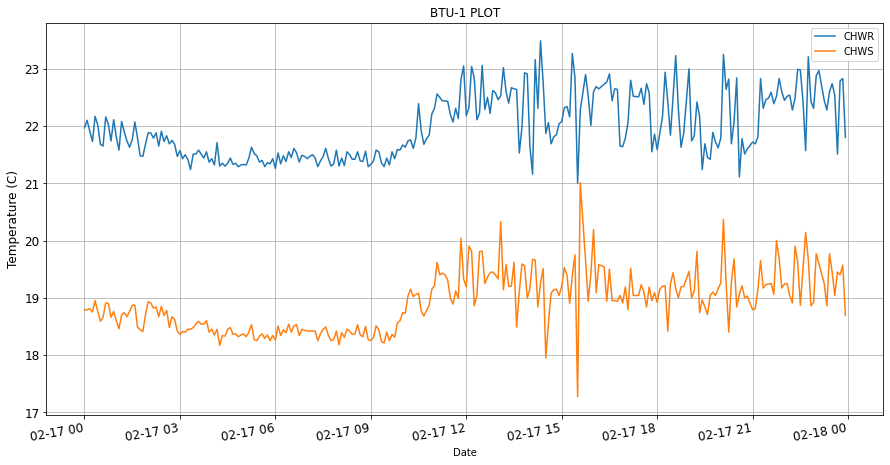

In [67]:
BTU1_Data.plot(x='Date',rot=10,y=['CHWR','CHWS'],fontsize=12,figsize=(15,8),grid=True,title='BTU-1 PLOT',)
plt.ylabel('Temperature (C)',fontsize=12)

#plt.savefig(r'C:\Users\Ramendra\Desktop\Data\BTU-1_Plot.png', dpi=300) 
# For saving image pass path 
plt.show()

* https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html
* Plotting BTU-2 Data

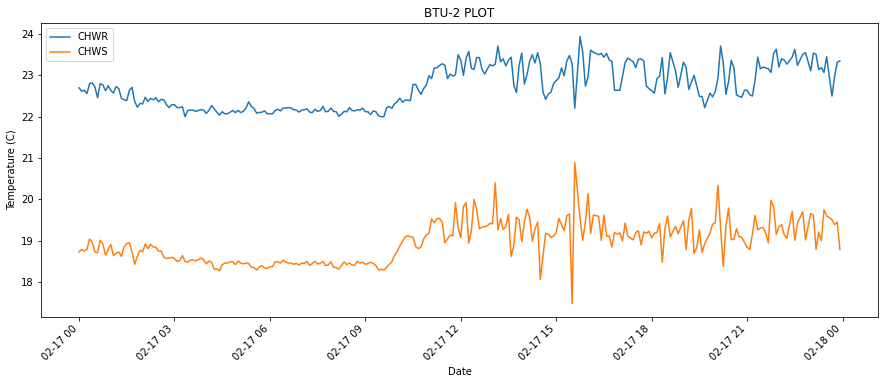

In [68]:
df1.loc[df1['Device Name']=="BTU-2"].plot(x='Date',rot=45,y=['CHWR','CHWS'],figsize=(15,6),grid=False)
plt.ylabel('Temperature (C)')
plt.title('BTU-2 PLOT')
plt.show()

### 12. Discretization and Binning

In [69]:
# Revisiting df1
df1.head()

,Device Name,Date,CHWR,CHWS,Flow,Load,Time
1,BTU-1,2017-02-17 23:55:00,21.80,18.69,96.0,22.0,23:55
2,BTU-2,2017-02-17 23:55:00,23.35,18.79,86.1,29.0,23:55
3,BTU-1,2017-02-17 23:50:00,22.83,19.57,93.5,22.5,23:50
4,BTU-2,2017-02-17 23:50:00,23.32,19.45,81.5,23.2,23:50
5,BTU-1,2017-02-17 23:45:00,22.79,19.40,98.0,24.5,23:45


In [70]:
 cats=pd.cut(df1['Load'],3)# here first argument the data ,second is the number of bins
    # It first sort the data then calculate--> Result=(maximum-minimum)/3.
    # Result of above operation is added in minimum value --> this is the first bin 
    # Similary all 3 equal spaced bins are calculated by adding above result in last value of previous bin.
    

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html

In [71]:
cats # The result is showing index of each value and bin in which it lie

1      (18.8, 29.5]
2      (18.8, 29.5]
3      (18.8, 29.5]
4      (18.8, 29.5]
5      (18.8, 29.5]
           ...     
570    (18.8, 29.5]
571    (18.8, 29.5]
572    (18.8, 29.5]
573    (18.8, 29.5]
574    (18.8, 29.5]
Name: Load, Length: 560, dtype: category
Categories (3, interval[float64]): [(8.068, 18.8] < (18.8, 29.5] < (29.5, 40.2]]

In [72]:
pd.value_counts(cats)
#The output is showing there are 519 entries in bin (18.8, 29.5] and 26 entries in bin (29.5, 40.2] and so on

(18.8, 29.5]     519
(29.5, 40.2]      26
(8.068, 18.8]     15
Name: Load, dtype: int64

In [73]:
# we can specify our on bins as list  as given below:
cats1=pd.cut(df1['Load'],[8,19,30,41])
pd.value_counts(cats1)

(19, 30]    521
(30, 41]     21
(8, 19]      18
Name: Load, dtype: int64

In [74]:
# We can also name individual group
bins=[8,19,30,41]
group_name=['Low load','Medium Load','High Load']
cats1=pd.cut(df1['Load'],bins,labels=group_name)
pd.value_counts(cats1)

Medium Load    521
High Load       21
Low load        18
Name: Load, dtype: int64

In [75]:
cat_q=pd.qcut(df1['Load'],4) # This qcut bins the data based on Sample quantiles 
pd.value_counts(cat_q)

(24.0, 25.5]     144
(8.099, 24.0]    141
(25.5, 27.0]     139
(27.0, 40.2]     136
Name: Load, dtype: int64

### 13. Removing duplicates

In [76]:
dup_data=pd.DataFrame({'apple':[3,5,1,2,2],'mango':[2,7,4,5,5],'days':['Mon','Tue','Wed','Thu','Thu'] })
dup_data=dup_data.reindex(columns=['days','apple','mango']) # rearranging the columns 
dup_data

,days,apple,mango
0,Mon,3,2
1,Tue,5,7
2,Wed,1,4
3,Thu,2,5
4,Thu,2,5


* We can see 3rd row is duplicated in 4rth row

In [77]:
dup_data.duplicated() # shows whether there is duplicate data or not.4rth row is considered as duplicated.

0    False
1    False
2    False
3    False
4     True
dtype: bool

In [78]:
undup_data=dup_data.drop_duplicates()
undup_data

,days,apple,mango
0,Mon,3,2
1,Tue,5,7
2,Wed,1,4
3,Thu,2,5


* Making Another data where only few columns has duplicated data.

In [79]:
dup_data_1=pd.DataFrame({'apple':[3,5,1,2,2],'mango':[2,7,4,10,5],'days':['Mon','Tue','Wed','Thu','Thu'] })
dup_data_1=dup_data_1.reindex(columns=['days','apple','mango']) # rearranging the columns 
dup_data_1

,days,apple,mango
0,Mon,3,2
1,Tue,5,7
2,Wed,1,4
3,Thu,2,10
4,Thu,2,5


In [80]:
und_data_1=dup_data_1.drop_duplicates(['days'])# If we want to filter duplicates based on only certain column.
und_data_1 # 

,days,apple,mango
0,Mon,3,2
1,Tue,5,7
2,Wed,1,4
3,Thu,2,10


In [81]:
# drop_duplicates by default keep the first and removes the duplicatd data after that.
# Passing keep='last' will preserve the last one
und_daata=dup_data.drop_duplicates(keep='last')
und_daata


,days,apple,mango
0,Mon,3,2
1,Tue,5,7
2,Wed,1,4
4,Thu,2,5


### 14. More on  -->.replace 

In [82]:
und_daata.replace([1,2],10) # all entries having value 1 and 2 are replaced by 10 

,days,apple,mango
0,Mon,3,10
1,Tue,5,7
2,Wed,10,4
4,Thu,10,5


In [83]:
und_daata.replace([1,2],[10,0.1])

,days,apple,mango
0,Mon,3.0,0.1
1,Tue,5.0,7.0
2,Wed,10.0,4.0
4,Thu,0.1,5.0


In [84]:
# Even a dictionary can be passed: in .replace()
und_daata.replace({1:10,2:20,3:30,5:50,4:40,7:70})

,days,apple,mango
0,Mon,30,20
1,Tue,50,70
2,Wed,10,40
4,Thu,20,50


In [85]:
## Revisting the data used intitially
data

,Device Name,Date,CHWR,CHWS,Flow,Load
1,BTU-1,2/17/2017 23:55,21.8,18.69,96,22
2,BTU-2,2/17/2017 23:55,23.35,18.79,86.1,29
3,BTU-1,2/17/2017 23:50,22.83,19.57,93.5,22.5
4,BTU-2,2/17/2017 23:50,23.32,19.45,81.5,23.2
5,BTU-1,2/17/2017 23:45,22.79,19.4,98,24.5
...,...,...,...,...,...,...
570,BTU-2,2/17/2017 0:10,22.64,18.75,94.9,27.2
571,BTU-1,2/17/2017 0:05,22.1,18.79,112.4,27.4
572,BTU-2,2/17/2017 0:05,22.62,18.79,95.7,27
573,BTU-1,2/17/2017 0:00,21.97,18.79,111.2,26


In [86]:
data.replace('--',np.nan) # This simply replace all the '--' with NaN.So simple

,Device Name,Date,CHWR,CHWS,Flow,Load
1,BTU-1,2/17/2017 23:55,21.8,18.69,96,22
2,BTU-2,2/17/2017 23:55,23.35,18.79,86.1,29
3,BTU-1,2/17/2017 23:50,22.83,19.57,93.5,22.5
4,BTU-2,2/17/2017 23:50,23.32,19.45,81.5,23.2
5,BTU-1,2/17/2017 23:45,22.79,19.4,98,24.5
...,...,...,...,...,...,...
570,BTU-2,2/17/2017 0:10,22.64,18.75,94.9,27.2
571,BTU-1,2/17/2017 0:05,22.1,18.79,112.4,27.4
572,BTU-2,2/17/2017 0:05,22.62,18.79,95.7,27
573,BTU-1,2/17/2017 0:00,21.97,18.79,111.2,26


### 15. Few Arguments to know while using pd.read_csv()
* Replacing entries,that can't be converted into numerical, with NaN and changing the specific column dtypes can be done while data is loaded using pd.read_csv.
* But for this we have to know all the entries on each column that can't be converted into numerical.
* In this case we know: 2nd, 3rd, 4rth and 5th column contaion following entries.
{2: ['--'], 3: ['hjkhk', '--'], 4: ['&', '##', '--'], 5: ['--']}

* pd.read_csv: It has many other arguments like skiprows, na_values, dtypes as given below :
* This one line of code can reduce lot of pain. We have skip the first row from the original csv file and thus second row wil appear as the zeroth row, and thus column name is changed.WOW!!!! See the code below (line number 159).
* In 'skiprows' : We have passed 0, so first row will be skipped and second row automaically becomes the colum header.In csv file  we can see that in second row we have first and second cells are blank, thus they appear as 'Unnamed:0' and 'Unnamed:1' being column header.
* In 'na_values' : we have passed dictionary, where keys are the name of columns and values are list of characters inside that column which can not be conveted into numeric.It converts all those entries into NaN at one go.
* finally, in 'dtype' : we have passed dictionary, where keys are the name of columns and values are data types into which we want to converts those columns.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

In [87]:
data1=pd.read_csv('BTU.csv',skiprows=[0],na_values={'CHWR':['--'],'CHWS':['hjkhk','--'],'Flow':['&', '##','--'],'Load':['--']}, dtype={'CHWR':float,'CHWS':float,'Flow':float,'TR':float})
data1.head()

,Unnamed: 0,Unnamed: 1,CHWR,CHWS,Flow,Load
0,BTU-1,2/17/2017 23:55,21.80,18.69,96.0,22.0
1,BTU-2,2/17/2017 23:55,23.35,18.79,86.1,29.0
2,BTU-1,2/17/2017 23:50,22.83,19.57,93.5,22.5
3,BTU-2,2/17/2017 23:50,23.32,19.45,81.5,23.2
4,BTU-1,2/17/2017 23:45,22.79,19.40,98.0,24.5


In [88]:
data1.isnull().sum()

Unnamed: 0     0
Unnamed: 1     0
CHWR           8
CHWS          11
Flow          10
Load           9
dtype: int64

In [89]:
data1.dtypes

Unnamed: 0     object
Unnamed: 1     object
CHWR          float64
CHWS          float64
Flow          float64
Load          float64
dtype: object

#### This much for this module. Detecting outliers and removing them will be covered in coming modules.
#### Feel Free to Share and Distribute.
#### Don't forget to follow me.
* https://github.com/Rami-RK/Python_Starter
*  https://www.linkedin.com/in/ramendra-kumar-57334478